In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from plotting_tempelate import plot_scaling_lines
import ast
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams.update({'font.size': 18})

In [2]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT']
raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] + raw_data['OPT']['init_time[s]']
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] + raw_data['MP_ASP']['init_time[s]']
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] + raw_data['MP_APST4']['init_time[s]']
raw_data['IT']['_time'] = raw_data['IT']['method2_time[s]'] + raw_data['IT']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))

KeyError: 'OPT'

In [ ]:
# Generate colors using a predefined colormap
colors = cm.tab10(np.linspace(0, 1, 6))
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

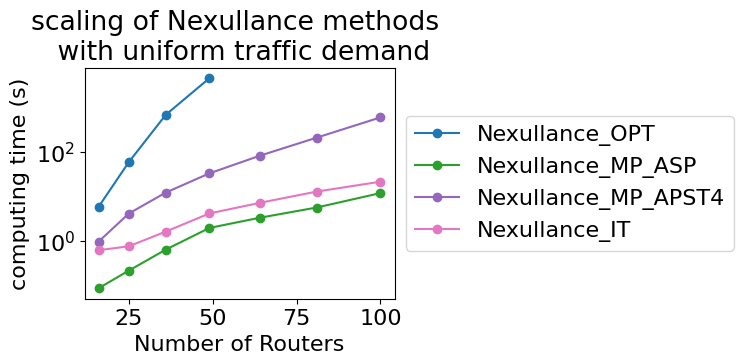

In [ ]:
traffic_pattern = "uniform"
_power_x = 1
_V = [ 16,  25,  36,  49,  64,  81, 100]
legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT']
_data={method: [] for method in methods}
for method in methods:
    for v in _V:
        _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']==traffic_pattern)]['_time'].values
        if len(_values):
            _data[method].append( _values[0] )


methods = list(_data.keys())
num_methods = len(methods)


# Plotting
plt.figure(figsize=(4, 3))  # Adjust size if necessary
for i, method in enumerate(methods):
    # Extracting performance metrics for each method, and plot
    metrics = _data[method]
    x_values = [_v ** _power_x for _v in _V]
    if len(metrics) < len (x_values):
        # truncate x_values if there are more metrics than x_values
        x_values = x_values[:len(metrics)]
    elif len(metrics) > len (x_values):
        raise ValueError("The length of metrics should be less than or equal to the length of x_values")

    plt.plot(x_values, metrics, marker='o', linestyle='-', color=colors[i], label=legends[i])

# Adding labels and title
plt.xlabel("Number of Routers")
plt.ylabel("computing time (s)")
plt.yscale("log")
plt.title("scaling of Nexullance methods \n with "+traffic_pattern + " traffic demand")
# Moving the legend outside the figure to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show plot
plt.show()


In [ ]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
# methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT']
methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT', 'ECMP_ASP', 'ECMP_APST4']
legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT', 'ECMP_ASP', 'ECMP_APST4']
V = 49
D = 8
_data = {
    'uniform': [],
    'shift_1': [],
    'shift_quater': [],
    'shift_half': [],
    'diagonal_1': [],
    'diagonal_quater': []
}
y_counter = {}.fromkeys(methods, 0) # for each method, add up the y values
for traffic_pattern, data in _data.items():
    # TODO: baseline should be OPT
    baseline = (raw_data["MP_APST4"][(raw_data["MP_APST4"]["V"]==V) & (raw_data["MP_APST4"]["traffic_pattern"]==traffic_pattern)])["Phi_NEXU[Gbps]"].values[0]
    # baseline = (raw_data["OPT"][(raw_data["OPT"]["V"]==49) & (raw_data["OPT"]["traffic_pattern"]=="uniform")])["Phi_NEXU[Gbps]"].values[0]
    for method_name in methods:
        if method_name == "ECMP_ASP":
            _value = raw_data["MP_ASP"][(raw_data["MP_ASP"]["V"]==V) & (raw_data["MP_ASP"]["traffic_pattern"]==traffic_pattern)]["Phi_ECMP_ASP[Gbps]"].values[0]
            _data[traffic_pattern].append(_value/baseline)
        elif method_name == "ECMP_APST4":
            _value = raw_data["MP_APST4"][(raw_data["MP_APST4"]["V"]==V) & (raw_data["MP_APST4"]["traffic_pattern"]==traffic_pattern)]["Phi_ECMP_APST4[Gbps]"].values[0]
            _data[traffic_pattern].append(_value/baseline)
        elif method_name == "OPT":
            _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["Phi_NEXU[Gbps]"].values
            if len(_value):
                _value = _value[0]
            else:
                _value = 0
            _data[traffic_pattern].append(_value/baseline)
        else:
            _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["Phi_NEXU[Gbps]"].values[0]
            _data[traffic_pattern].append(_value/baseline)
        
        y_counter[method_name] += _value
            
_data['average'] = np.array(list(y_counter.values()))/np.max(list(y_counter.values()))
# plot_bench_bars(plot_data, methods, f"RRG({V},{D})", "traffic demand patterns", "Normalized Phi", normalized=True)

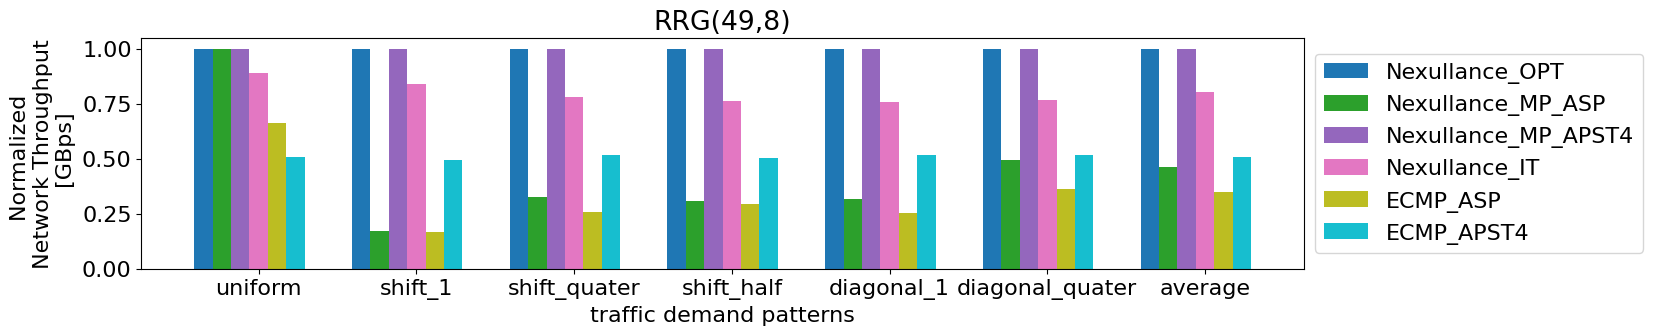

In [ ]:
num_methods = len(methods)
bar_width = 0.7 / num_methods  # Adjust this scaling factor as needed

# Generating x positions for each group of bars
x_positions = np.arange(len(_data))  

# # Generate colors using a predefined colormap
# colors = cm.tab10(np.linspace(0, 1, num_methods))[:6]

# Plotting
plt.figure(figsize=(15, 3))  # Adjust size if necessary
for i, method in enumerate(methods):
    # Extracting performance metrics for each method
    performance = [_data[bench][i] for bench in _data]
    # Adjusting x positions for each group of bars
    x_positions_adjusted = x_positions + (i - num_methods//2) * bar_width
    # Plotting bars for each method
    plt.bar(x_positions_adjusted, performance, width=bar_width, align='center', color = colors[i], label=legends[i])

# Adding labels and title
plt.xlabel("traffic demand patterns")
plt.ylabel("Normalized \n Network Throughput \n [GBps]")
plt.title(f"RRG({V},{D})")
plt.xticks(x_positions, _data.keys())
# Moving the legend outside the figure to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show plot
plt.show()